In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from utils import plot_correlation_matrix, plot_scatter_matrix, ip_country
from sklearn.utils import shuffle
from typing import Tuple
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

Загружаем данные

In [33]:
df = pd.read_csv('./Dataset-Unicauca-Version2-87Atts.csv', delimiter=',')
df = shuffle(df)
n_row, n_col = df.shape
print(f'There are {n_row} rows and {n_col} columns')

There are 1000 rows and 87 columns


Подробнее осматриваем данные

In [36]:
df.head(5)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
656,192.168.180.51-10.200.7.4-57797-3128-6,192.168.180.51,57797,10.200.7.4,3128,6,26/04/201711:11:21,466412,11,49,...,0,0,0,0,0,0,0,BENIGN,130,HTTP_CONNECT
435,192.168.180.37-10.200.7.9-2004-3128-6,10.200.7.9,3128,192.168.180.37,2004,6,26/04/201711:11:21,1,2,0,...,0,0,0,0,0,0,0,BENIGN,7,HTTP
363,10.200.7.218-65.52.108.33-36123-443-6,10.200.7.218,36123,65.52.108.33,443,6,26/04/201711:11:20,184664,1,1,...,0,0,0,0,0,0,0,BENIGN,212,MICROSOFT
618,179.1.4.237-10.200.7.199-443-46298-6,10.200.7.199,46298,179.1.4.237,443,6,26/04/201711:11:21,111089,7,5,...,0,0,0,0,0,0,0,BENIGN,126,GOOGLE
839,192.168.10.47-10.200.7.6-51859-3128-6,192.168.10.47,51859,10.200.7.6,3128,6,26/04/201711:11:22,87851,3,13,...,0,0,0,0,0,0,0,BENIGN,130,HTTP_CONNECT


In [5]:
df.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,...,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,3.799938e+04,1.204246e+04,6.005508e+00,2.544247e+07,6.237799e+01,6.534083e+01,4.683323e+04,8.445742e+04,5.123645e+02,9.340408e+00,...,2.569738e+01,2.981990e+05,1.836406e+05,5.229372e+05,1.676336e+05,8.524211e+06,1.370991e+06,9.743845e+06,7.252097e+06,1.029508e+02
std,2.201713e+04,2.044916e+04,3.274574e-01,4.014430e+07,1.094086e+03,1.108092e+03,1.816196e+06,2.124319e+06,1.039319e+03,8.299983e+01,...,6.025989e+00,2.349390e+06,1.325838e+06,3.266508e+06,2.064219e+06,1.706568e+07,4.814474e+06,1.888557e+07,1.600754e+07,5.129198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.697000e+03,4.430000e+02,6.000000e+00,6.280000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+01
50%,4.937700e+04,3.128000e+03,6.000000e+00,5.847295e+05,6.000000e+00,5.000000e+00,4.430000e+02,2.080000e+02,2.060000e+02,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
75%,5.379900e+04,3.128000e+03,6.000000e+00,4.500153e+07,1.500000e+01,1.500000e+01,1.769000e+03,3.629000e+03,6.130000e+02,6.000000e+00,...,3.200000e+01,4.500000e+01,0.000000e+00,5.700000e+01,2.000000e+00,7.506747e+06,0.000000e+00,8.034389e+06,5.369712e+06,1.300000e+02
max,6.553400e+04,6.553400e+04,1.700000e+01,1.200000e+08,4.531900e+05,5.421960e+05,6.780236e+08,1.345796e+09,3.283200e+04,1.606000e+04,...,5.230000e+02,1.146950e+08,7.297136e+07,1.146950e+08,1.146950e+08,1.200000e+08,7.738746e+07,1.200000e+08,1.200000e+08,2.220000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577296 entries, 1224382 to 594533
Data columns (total 87 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Flow.ID                      object        
 1   Source.IP                    object        
 2   Source.Port                  int64         
 3   Destination.IP               object        
 4   Destination.Port             int64         
 5   Protocol                     int64         
 6   Timestamp                    datetime64[ns]
 7   Flow.Duration                int64         
 8   Total.Fwd.Packets            int64         
 9   Total.Backward.Packets       int64         
 10  Total.Length.of.Fwd.Packets  int64         
 11  Total.Length.of.Bwd.Packets  float64       
 12  Fwd.Packet.Length.Max        int64         
 13  Fwd.Packet.Length.Min        int64         
 14  Fwd.Packet.Length.Mean       float64       
 15  Fwd.Packet.Length.Std        float64       


Обрабатываем фичу времени

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'].map(lambda x: x[:10] + ' ' + x[10:-1]))

Смотрим корреляции

/home/maxim/PycharmProjects/tickus_network/utils.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')  # drop columns with NaN
/home/maxim/PycharmProjects/tickus_network/utils.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


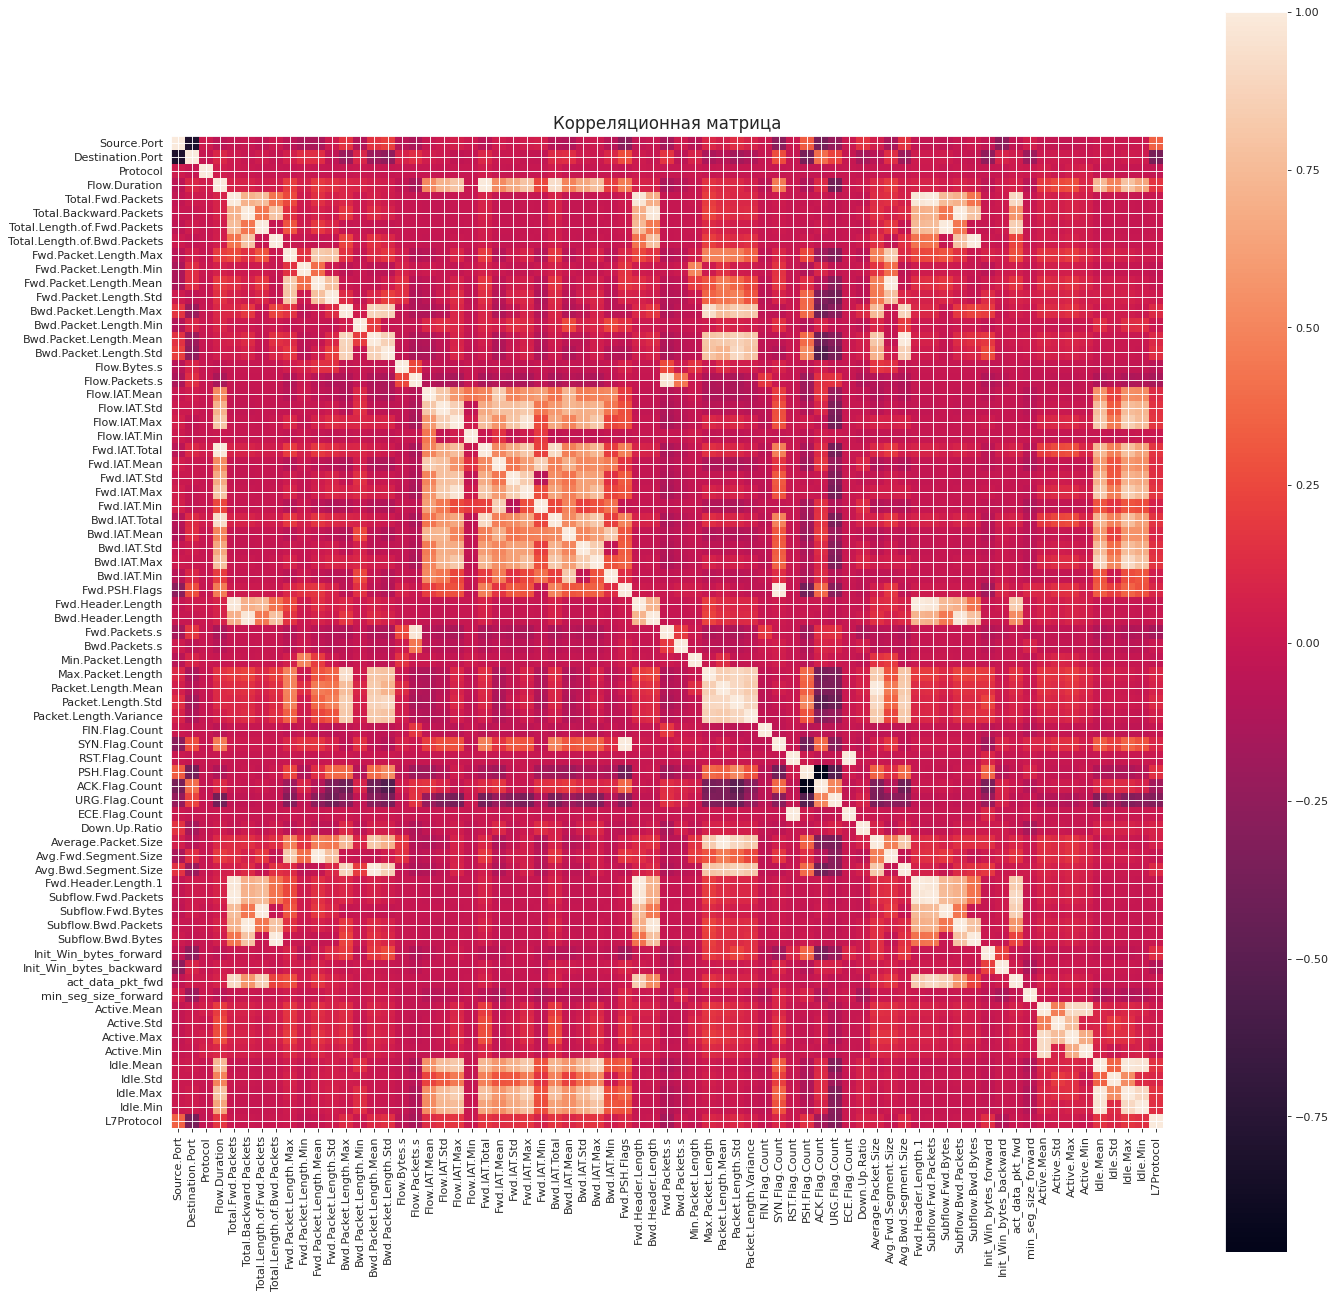

In [7]:
plot_correlation_matrix(df, 20)

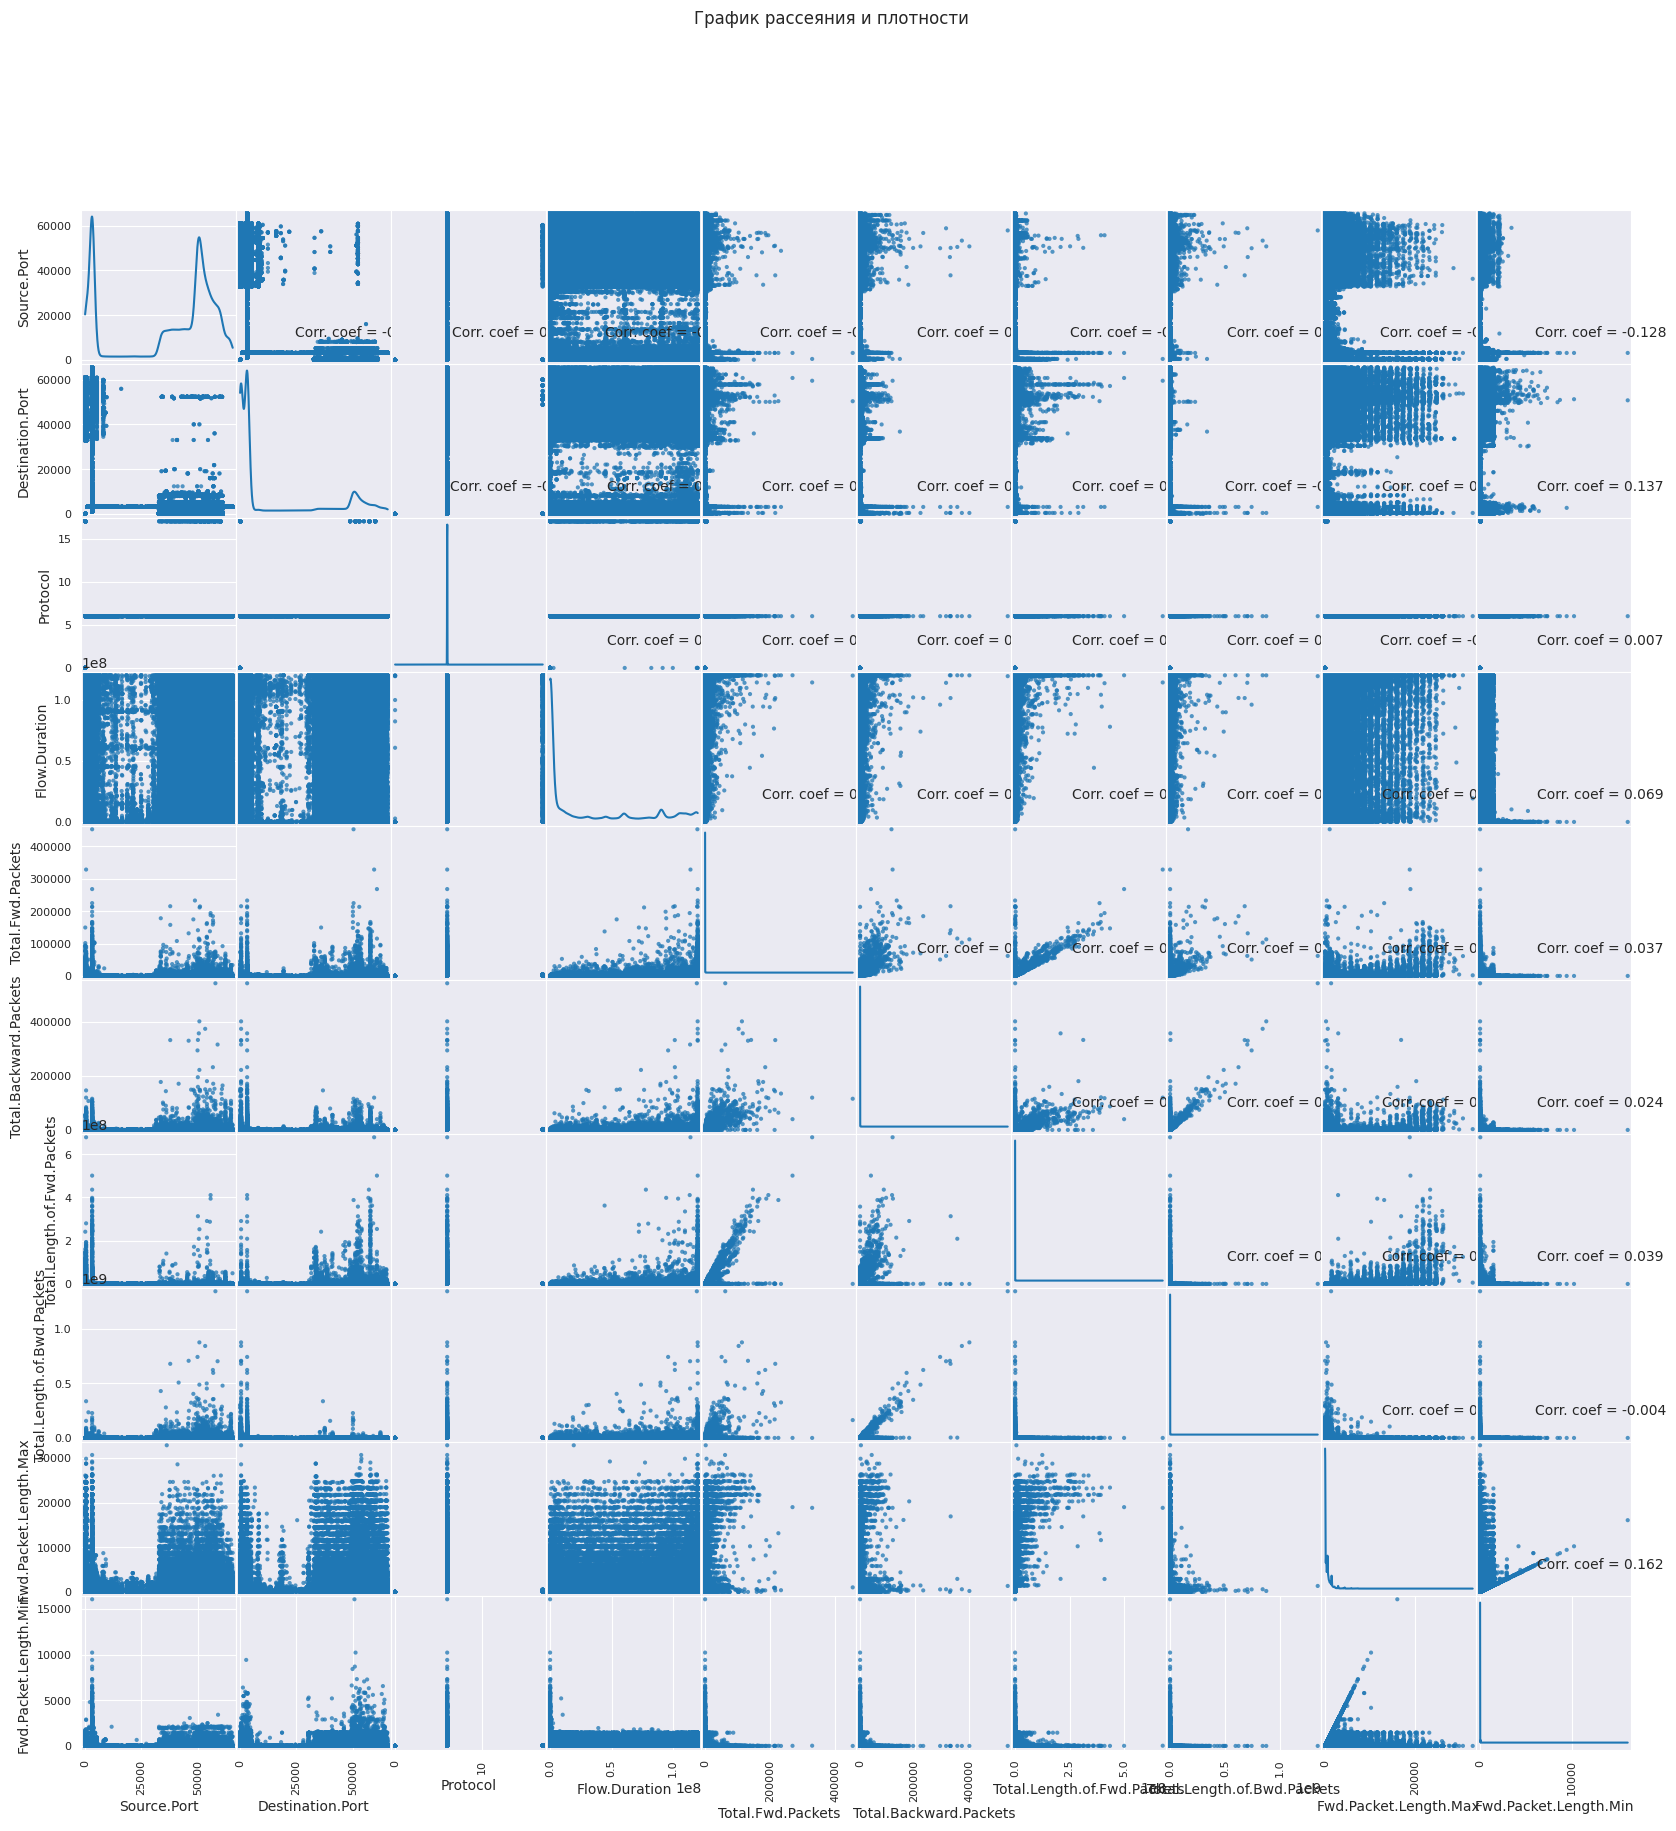

In [8]:
plot_scatter_matrix(df, 20, 10)

Начинаем собирать и смотреть статистику

/tmp/ipykernel_66685/1659250983.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(connection_flow_count, kde=False, rug=True, label="S")


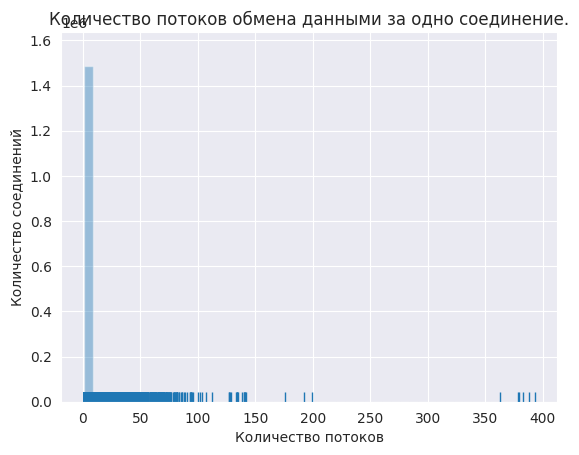

In [9]:
connection_flow_count = df.groupby('Flow.ID').apply(lambda flow: len(flow))
ax = sns.distplot(connection_flow_count, kde=False, rug=True, label="S")
ax.set(xlabel='Количество потоков', ylabel='Количество соединений',
       title='Количество потоков обмена данными за одно соединение.')
plt.show()

Исследуем популярные протоколы соединения

In [10]:
df_proto_counts = df['ProtocolName'].value_counts()
df_proto_counts

GOOGLE          959110
HTTP            683734
HTTP_PROXY      623210
SSL             404883
HTTP_CONNECT    317526
                 ...  
STARCRAFT            3
QQ                   2
99TAXI               1
NFS                  1
SOCKS                1
Name: ProtocolName, Length: 78, dtype: int64

In [11]:
protocol_based = ['SOCKS', 'MAIL_IMAPS', 'SSL', 'SSL_NO_CERT', 'RADIUS', 'OPENVPN', 'SNMP', 'IP_OSPF', 'BGP',
                  'FTP_CONTROL', 'NTP', 'SSH', 'FTP_DATA', 'DNS', 'IP_ICMP', 'SSL', 'NFS', 'RTMP']
http = ['HTTP', 'HTTP_PROXY', 'HTTP_CONNECT', 'HTTP_DOWNLOAD']


def apps_relabel(x):
    if http.count(x):
        return 'HTTP_BROWSING'
    else:
        return x


df['ProtocolName'] = df['ProtocolName'].apply(lambda x: apps_relabel(x))
df_proto = df[~df['ProtocolName'].isin(protocol_based)]

In [12]:
df_proto['ProtocolName'].value_counts(ascending=False)

HTTP_BROWSING        1624986
GOOGLE                959110
YOUTUBE               170781
AMAZON                 86875
MICROSOFT              54710
GMAIL                  40260
WINDOWS_UPDATE         34471
SKYPE                  30657
FACEBOOK               29033
DROPBOX                25102
YAHOO                  21268
TWITTER                18259
CLOUDFLARE             14737
MSN                    14478
CONTENT_FLASH           8589
APPLE                   7615
OFFICE_365              5941
WHATSAPP                4593
INSTAGRAM               2415
WIKIPEDIA               2025
MS_ONE_DRIVE            1748
NETFLIX                 1560
APPLE_ITUNES            1287
SPOTIFY                 1269
APPLE_ICLOUD            1200
EBAY                    1192
GOOGLE_MAPS              807
EASYTAXI                 705
TEAMVIEWER               527
MQTT                     302
TOR                      276
UBUNTUONE                249
EDONKEY                   95
WAZE                      79
DEEZER        

Смотрим активность IP адресов

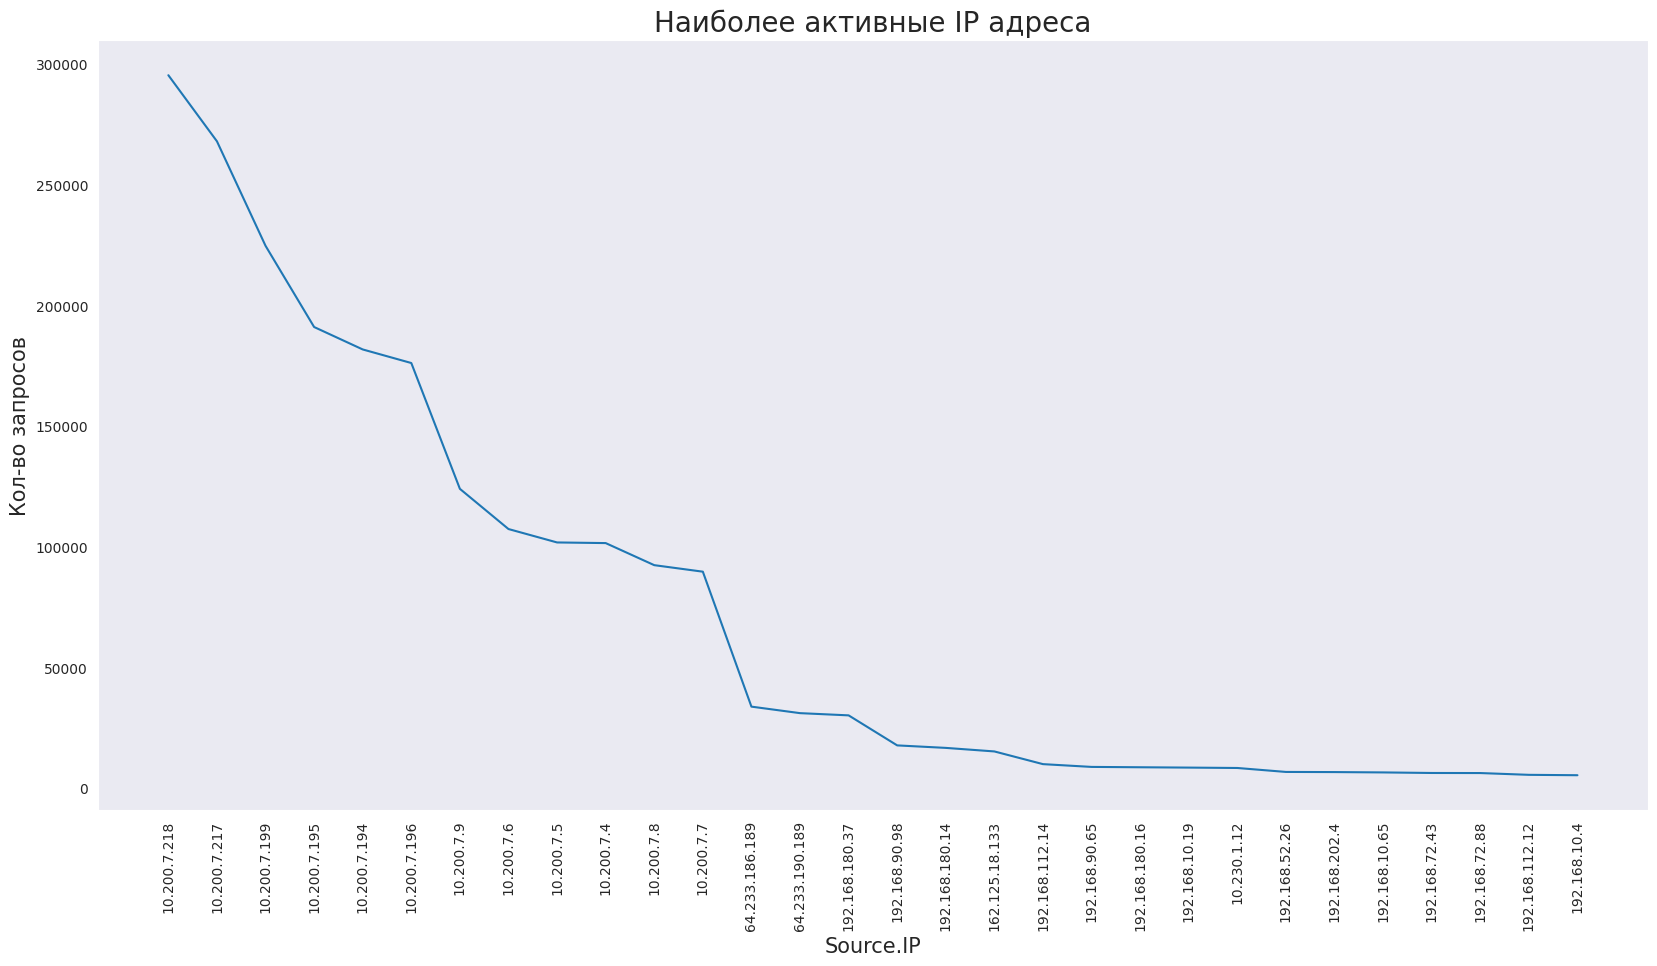

In [13]:
sour_feat = pd.DataFrame(df['Source.IP'].value_counts()[:30])
plt.figure(figsize=(20, 10))
plt.plot(sour_feat)
plt.xticks(rotation=90)
plt.xlabel('Source.IP', {'fontsize': 15})
plt.ylabel('Кол-во запросов', {'fontsize': 15})
plt.title('Наиболее активные IP адреса', {'fontsize': 20})
plt.grid()
sour_feat = sour_feat.reset_index()['index'].values

Данных по регионам в датасете нет - значит запросим у сторонних сервисов данные об IP

In [6]:
ips = df['Source.IP'].unique()
mapper = np.vectorize(ip_country)
countries = mapper(ips)


def get_country_by_ip(ip: str) -> str:
    pos, = np.where(ips == ip)
    return countries[pos][0]


df.loc[:, 'Country'] = pd.Series(df['Source.IP'].map(lambda x: get_country_by_ip(x)), index=df.index)

In [15]:
df['Country'].value_counts()

Not found                 3389704
United States              164762
Colombia                    13031
Luxembourg                   2656
Canada                       2155
Germany                       889
Ireland                       859
Netherlands                   692
United Kingdom                507
Slovakia                      375
France                        316
Argentina                     233
Spain                         156
Romania                       151
Hong Kong                     129
Singapore                     121
Czechia                        81
Brazil                         74
China                          69
Russia                         60
Japan                          46
None                           43
Mexico                         30
Poland                         22
Switzerland                    22
Sweden                         21
Chile                          19
Seychelles                     14
Austria                        10
Italy         

Статистика запросов по времени

In [22]:
morning = df[(4 <= df['Timestamp'].dt.hour) & (df['Timestamp'].dt.hour < 12)]
day = df[(12 <= df['Timestamp'].dt.hour) & (df['Timestamp'].dt.hour < 16)]
evening = df[(16 <= df['Timestamp'].dt.hour) & (df['Timestamp'].dt.hour < 22)]
night = df[(22 <= df['Timestamp'].dt.hour) | (df['Timestamp'].dt.hour >= 0) & (df['Timestamp'].dt.hour < 4)]

In [38]:
def get_stats(df_part: pd.DataFrame) -> Tuple[int, int]:
    mean = df_part['Flow.Bytes.s'].mean()
    if math.isnan(mean):
        mean = 0
    return df_part.shape[0], int(mean)

In [39]:
morning_stats = get_stats(morning)
day_stats = get_stats(day)
evening_stats = get_stats(evening)
night_stats = get_stats(night)

In [41]:
print(f"Сделано запросов утром {morning_stats[0]}, средний объём трафика {morning_stats[1]} байт/c")
print(f"Сделано запросов днём {day_stats[0]}, средний объём трафика {day_stats[1]} байт/c")
print(f"Сделано запросов вечером {evening_stats[0]}, средний объём трафика {evening_stats[1]} байт/c")
print(f"Сделано запросов ночью {night_stats[0]}, средний объём трафика {night_stats[1]} байт/c")

Сделано запросов утром 3201204, средний объём трафика 4252799 байт/c
Сделано запросов днём 45, средний объём трафика 13415338 байт/c
Сделано запросов вечером 0, средний объём трафика 0 байт/c
Сделано запросов ночью 376047, средний объём трафика 2310207 байт/c


Смотрим объёмы трафика по IP, детальней

In [21]:
hiprof = df[df['Flow.Bytes.s'] > (1024 * 8 * 2048)]['Source.IP']
med1prof = df[(df['Flow.Bytes.s'] < (1024 * 8 * 2048)) & (df['Flow.Bytes.s'] > (1024 * 8 * 1024))]['Source.IP']
med2prod = df[(df['Flow.Bytes.s'] < (1024 * 8 * 1024)) & (df['Flow.Bytes.s'] > (1024 * 8 * 256))]['Source.IP']
lowprof = df[(df['Flow.Bytes.s'] < (1024 * 8 * 256))]['Source.IP']

In [43]:
print(hiprof.describe())
print('-----------------------')
print(med1prof.describe())
print('-----------------------')
print(med2prod.describe())
print('-----------------------')
print(lowprof.describe())

count          46900
unique          1371
top       10.200.7.6
freq            4596
Name: Source.IP, dtype: object
-----------------------
count          56062
unique          1241
top       10.200.7.9
freq            9449
Name: Source.IP, dtype: object
-----------------------
count          37062
unique          1414
top       10.200.7.9
freq            4104
Name: Source.IP, dtype: object
-----------------------
count          3437272
unique            6524
top       10.200.7.218
freq            289297
Name: Source.IP, dtype: object


Обучим модель на определении предполагаемой скорости обмена данных

In [10]:
dataset = df.drop(['Flow.ID', 'Source.IP', 'ProtocolName', 'Label', 'Timestamp', 'Destination.IP', 'Country'], axis=1)

dataX = dataset.drop(["Flow.Bytes.s"], axis=1)
dataY = dataset['Flow.Bytes.s']

trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.3)

In [52]:
clf = RandomForestRegressor(verbose=999, n_jobs=27)
clf.fit(trainX, trainY)
predictY = clf.predict(testX)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.7min

building tree 34 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elaps

In [54]:
print(f"R2 {r2_score(testY, predictY)}")
print(f"MAE {mean_absolute_error(testY, predictY)}")

R2 0.9968798140988833
MAE 42579.85323826814


Кластеризация по регионам

In [ ]:
dataset_tsne = df.drop(['Flow.ID', 'Source.IP', 'Label', 'Timestamp', 'Destination.IP'], axis=1)
dataset_tsne['Country'] = LabelEncoder().fit_transform(df['Country'].values)
dataset_tsne['ProtocolName'] = LabelEncoder().fit_transform(df['ProtocolName'].values)

In [11]:
tsne_results = TSNE(n_components=2,
                  learning_rate='auto',
                  init='random',
                  perplexity=3,
                  random_state=42).fit_transform(dataset_tsne)

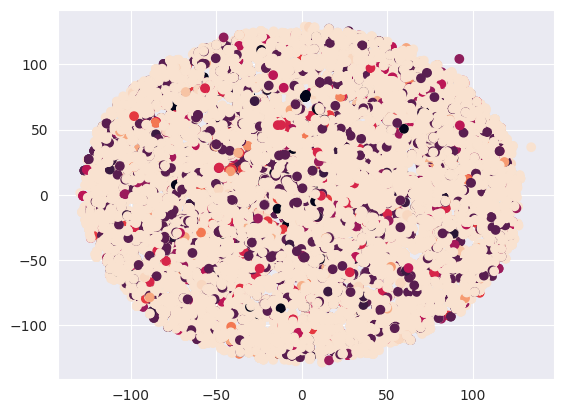

In [21]:
plt.show()
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

ids = np.where(dataset_tsne['Country'].values != 25)

plt.scatter(tsne_results['tsne1'].values[ids], tsne_results['tsne2'].values[ids],
            c=dataset_tsne['Country'].values[ids] / dataset_tsne['Country'].values.max())
plt.show()